In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode escape")

In [29]:
df.shape

(11251, 15)

In [30]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Data Cleaning

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [33]:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [51]:
df.drop(columns = ["Status", 'unnamed1'], inplace = True)

In [53]:
df.dropna(inplace=True)

In [54]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [55]:
df.shape

(11239, 13)

In [60]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

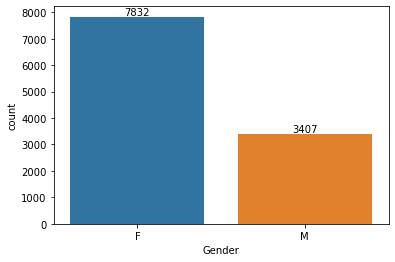

In [63]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

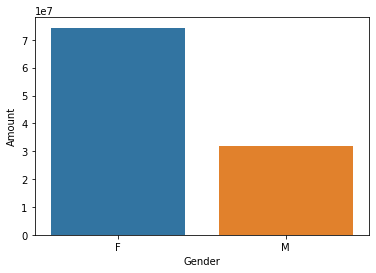

In [65]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Gender', y='Amount', data = sales_gen)

Here, we can clearly observe that most of the buyers are female, and also the purchasing power of females is greater than males

## Age

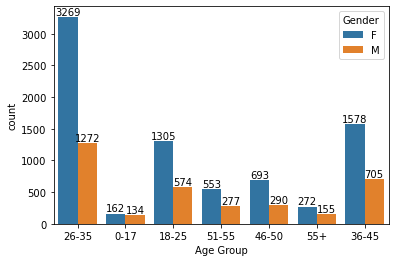

In [68]:
ax = sns.countplot(data = df, x = 'Age Group' , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

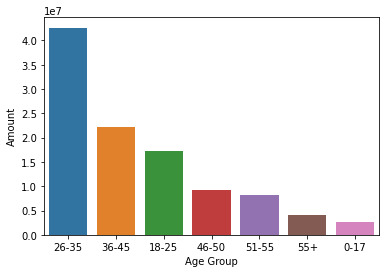

In [71]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age)

From the above two graphs, we can say that most of the buyers are of age group 26-35 females 

## Marital Status

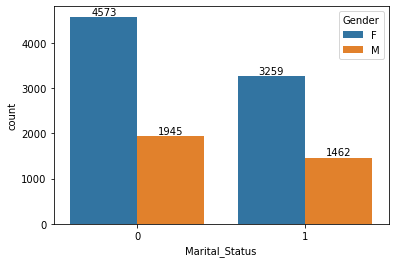

In [76]:
ax = sns.countplot(x='Marital_Status', data=df, hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

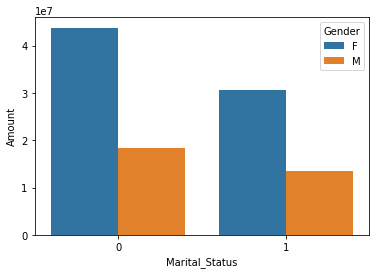

In [78]:
sales_ms = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Marital_Status', y='Amount', data=sales_ms, hue='Gender')

Most of the buyers are married women with higher purchasing power

## States

<AxesSubplot:xlabel='State', ylabel='Amount'>

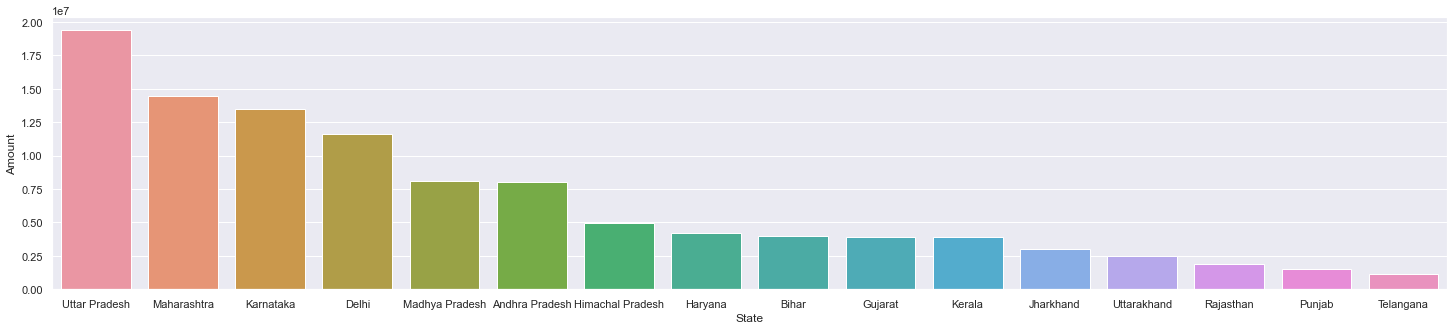

In [85]:
sales_State = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State', y='Amount', data=sales_State)

<AxesSubplot:xlabel='State', ylabel='Orders'>

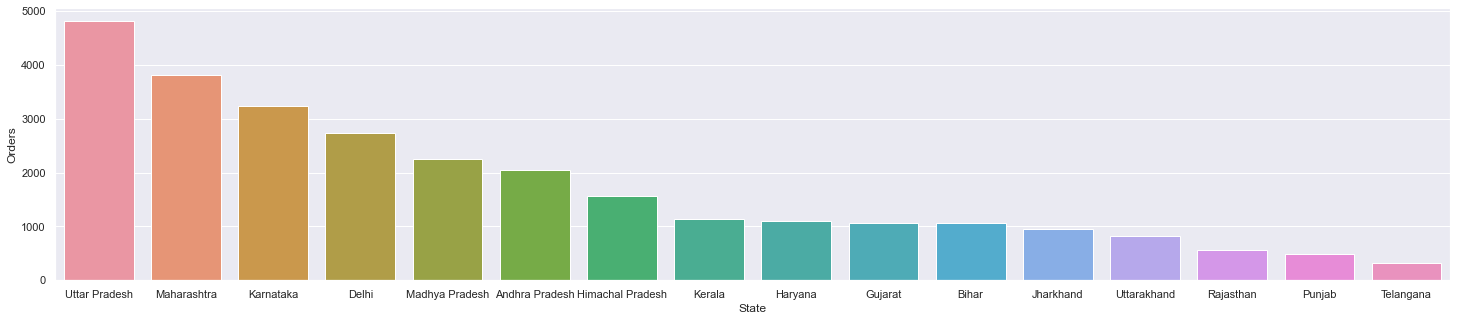

In [86]:
sales_State = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State', y='Orders', data=sales_State)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

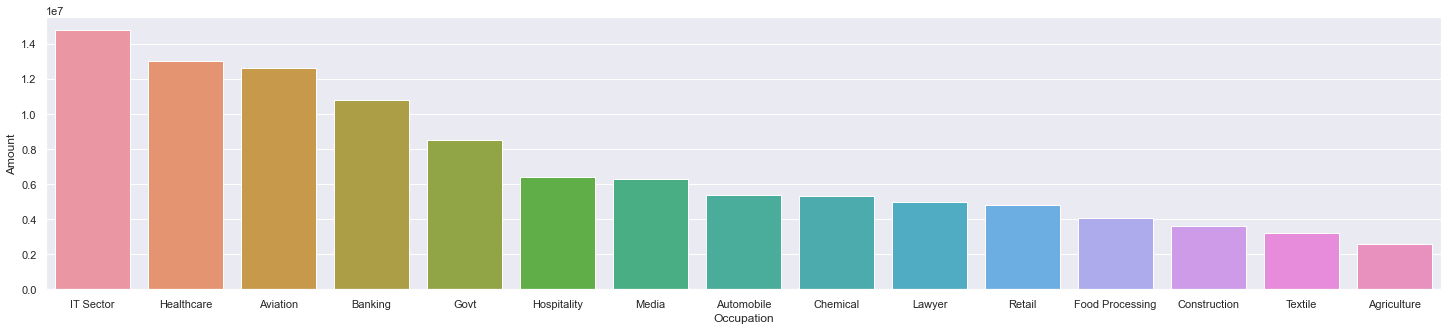

In [88]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

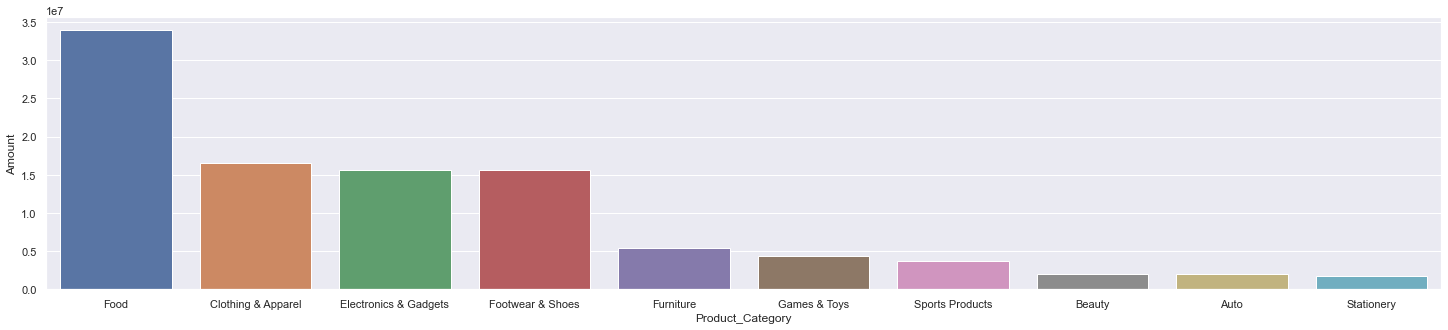

In [91]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_Category', y='Amount', data=sales_product)

# Conclusion

1. Based on above observations, married women in the age group of 26-35 years are most of the buyers.
2. The top 3 states with large number of orders and purchasing power are UP, Maharastra and Karnataka.
3. Most bought items are Food, Clothing and Apparel, and  Electronics and gadgets.
4. The buyers comes from different occupation, mostly coming from IT, Healthcare and Aviation.